<a href="https://colab.research.google.com/github/stefymojica/MACC/blob/main/enfermedad_coronaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediccion del Riesgo de Enfermedad Coronaria**


## Integrantes:

*   Stefany Paola Mojica Melo


# Preprocesamiento y Preparacion de Datos

In [2]:
# Import de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="viridis")

In [3]:
# Cargar archivo
file_path = '/content/framingham.csv'

try:
  df = pd.read_csv(file_path)
  print("El archivo se cargó correctamente.")
except FileNotFoundError:
  print(f"El archivo '{file_path}' no se encontró.")

El archivo se cargó correctamente.


In [4]:
# Paso 1 - descripcion general del dataframe
if 'df' in locals():

    print("--- 1. Información General del DataFrame ---")
    df.info()
    print("\n" + "="*50 + "\n")

    print("--- 2. Primeras 5 Filas del DataFrame ---")
    display(df.head())
    print("\n" + "="*50 + "\n")

    print("--- 3. Resumen Estadístico de Columnas Numéricas ---")
    display(df.describe())

else:
    print("Error: El DataFrame 'df' no ha sido definido.")
    print("Por favor, completa el Paso 0: Carga de Datos.")

--- 1. Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0




--- 3. Resumen Estadístico de Columnas Numéricas ---


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


--- Columnas con Valores Faltantes ---


,conteo_faltantes,porcentaje_faltantes,tipo de dato
glucose,388,9.155262,float64
education,105,2.477584,float64
BPMeds,53,1.250590,float64
totChol,50,1.179802,float64
cigsPerDay,29,0.684285,float64
BMI,19,0.448325,float64
heartRate,1,0.023596,float64


--- Barras con columnas de valores faltantes---


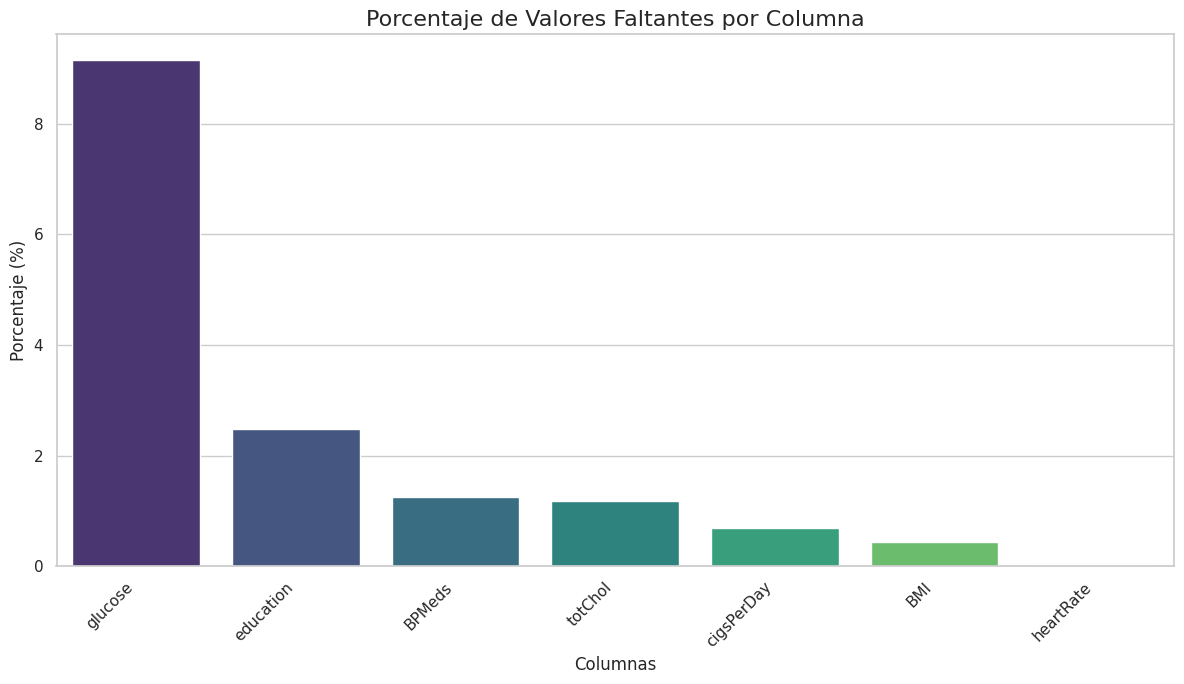

--- Histogramas de columnas con valores faltantes---


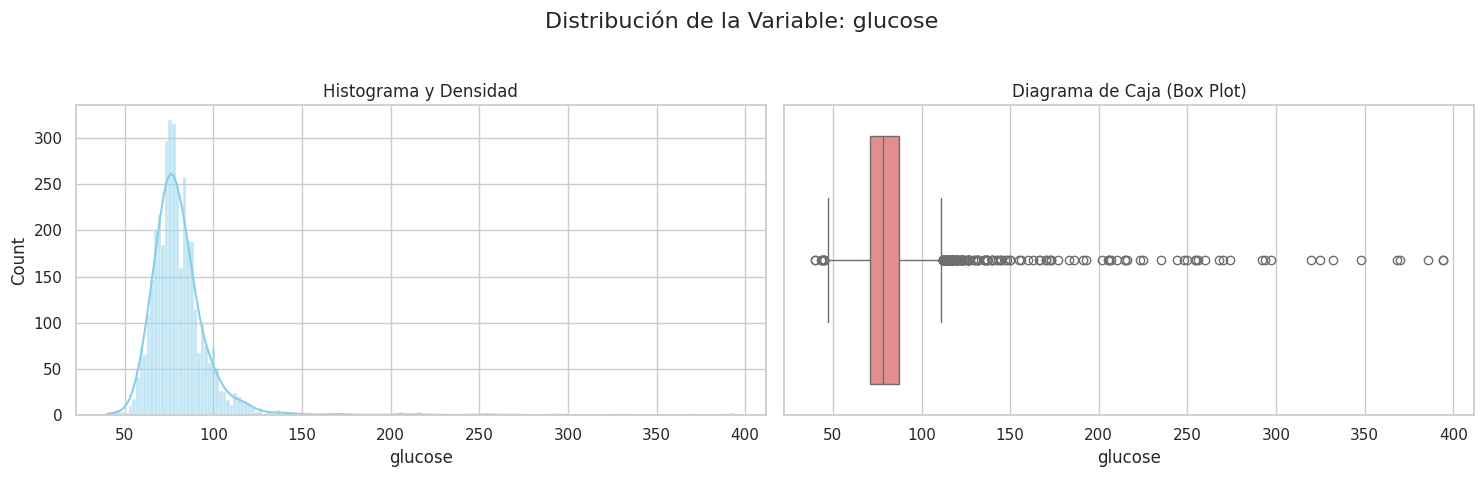

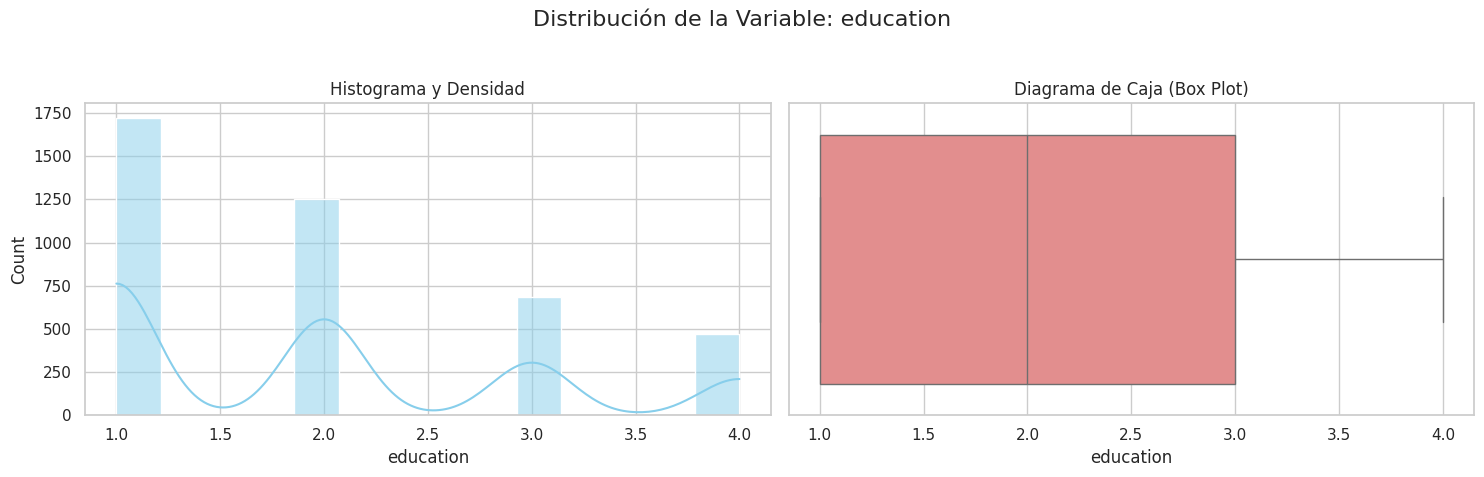

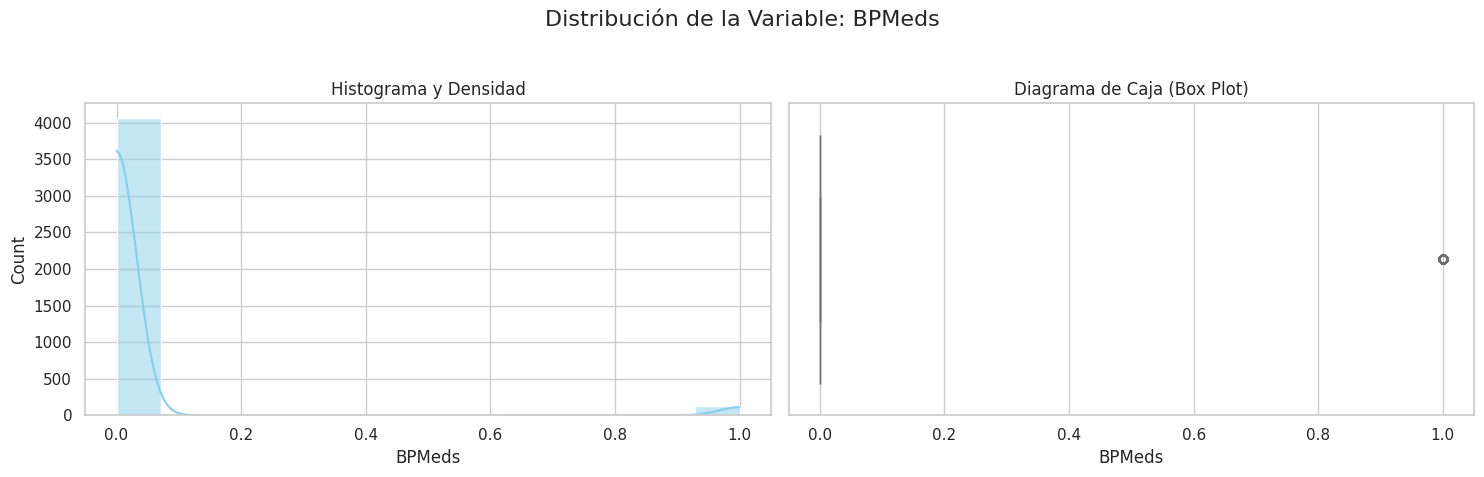

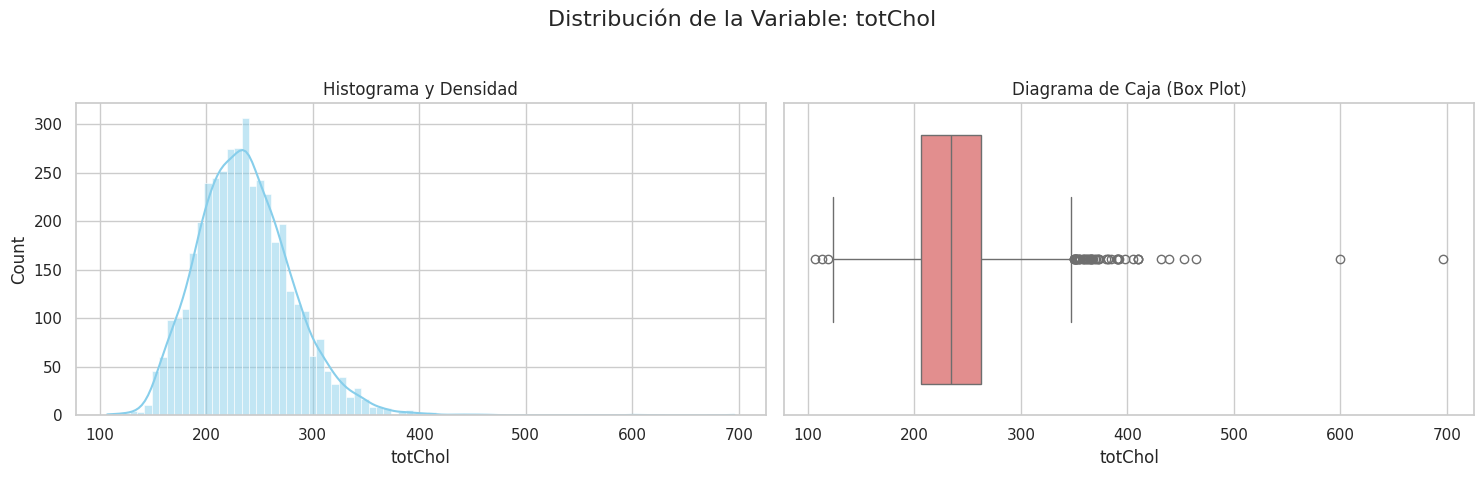

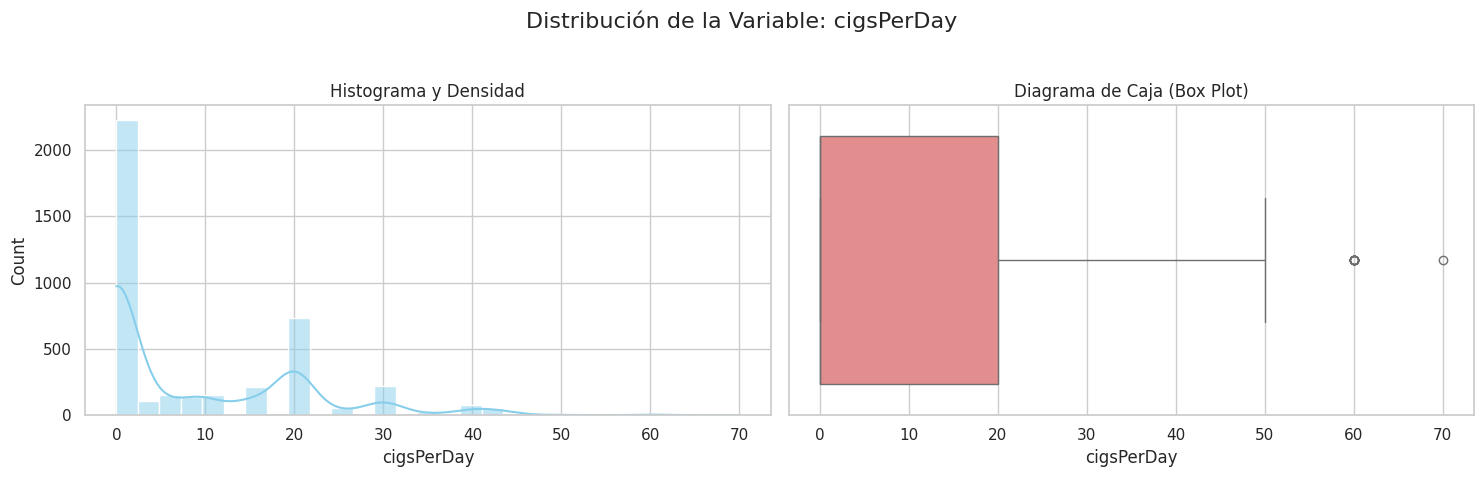

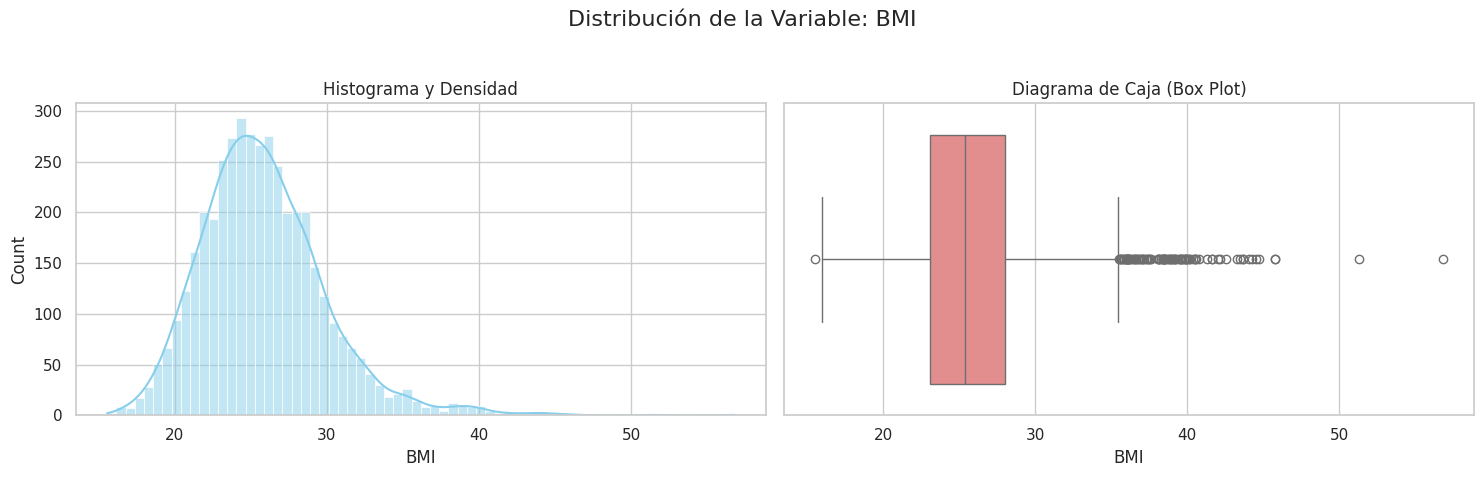

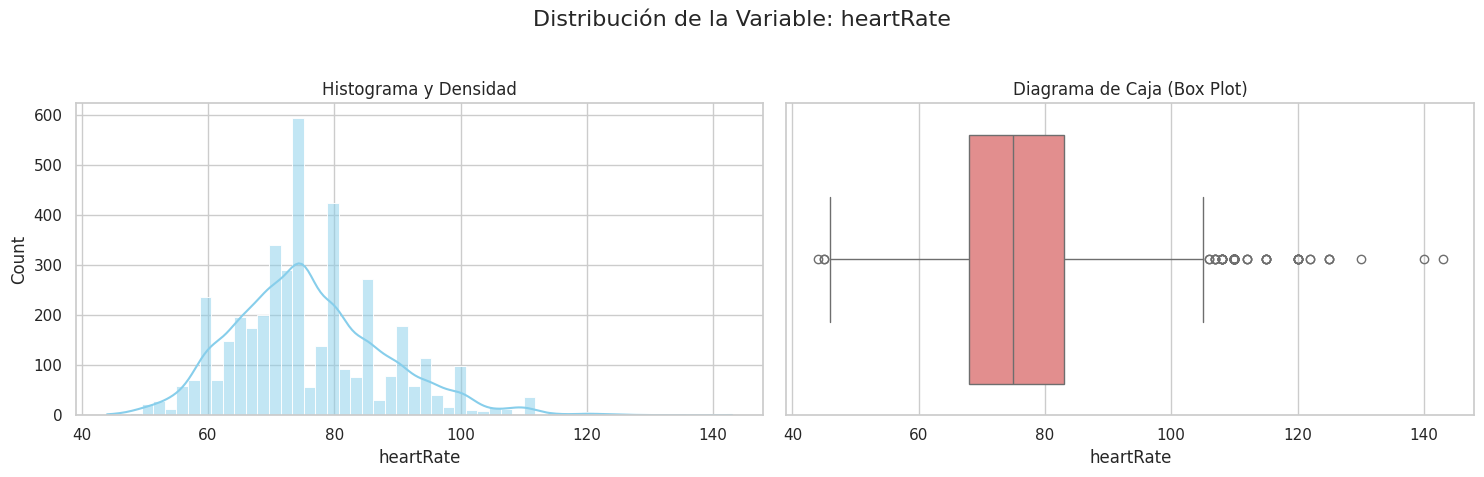

In [5]:
if 'df' in locals():
    missing_values_count = df.isnull().sum()
    total_rows = len(df)
    missing_values_percentage = (missing_values_count / total_rows) * 100
    d_type = df.dtypes

    missing_data_report = pd.DataFrame({
        'conteo_faltantes': missing_values_count,
        'porcentaje_faltantes': missing_values_percentage,
        'tipo de dato': d_type
    })

    missing_data_report = missing_data_report[
        missing_data_report['conteo_faltantes'] > 0
    ].sort_values(by='porcentaje_faltantes', ascending=False)

    print("--- Columnas con Valores Faltantes ---")
    if not missing_data_report.empty:
        display(missing_data_report)

        print("--- Barras con columnas de valores faltantes---")

        plt.figure(figsize=(12, 7))
        sns.barplot(
            x=missing_data_report.index,
            y=missing_data_report['porcentaje_faltantes'],
            hue=missing_data_report.index,
            palette='viridis',
            legend=False
        )
        plt.title('Porcentaje de Valores Faltantes por Columna', fontsize=16)
        plt.xlabel('Columnas', fontsize=12)
        plt.ylabel('Porcentaje (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        print("--- Histogramas de columnas con valores faltantes---")
        cols_with_na = missing_data_report.index.tolist()
        for col in cols_with_na:
          fig, axes = plt.subplots(1, 2, figsize=(15, 5))
          fig.suptitle(f'Distribución de la Variable: {col}', fontsize=16)
          sns.histplot(data=df, x=col, kde=True, ax=axes[0], color='skyblue')
          axes[0].set_title('Histograma y Densidad')
          sns.boxplot(data=df, x=col, ax=axes[1], color='lightcoral')
          axes[1].set_title('Diagrama de Caja (Box Plot)')
          plt.tight_layout(rect=[0, 0.03, 1, 0.95])
          plt.show()

    else:
        print("No se encontraron valores faltantes")

else:
    print("Error: El DataFrame 'df' no ha sido definido.")

In [6]:
# Imputacion para las columnas con valores nulos

# Imputacion Mediana
for col in ['glucose', 'totChol', 'cigsPerDay', 'BMI']:
    df[col].fillna(df[col].median(), inplace=True)

# Imputacion Moda
for col in ['education', 'BPMeds']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Imputacion Media/Promediio
for col in ['heartRate']:
    df[col].fillna(df[col].mean(), inplace=True)


# Confirmacion de valores en  nulo
missing_values_count = df.isnull().sum()
total_rows = len(df)
missing_values_percentage = (missing_values_count / total_rows) * 100

missing_data_report = pd.DataFrame({
  'conteo_faltantes': missing_values_count,
  'porcentaje_faltantes': missing_values_percentage,
})
print(missing_data_report)

                 conteo_faltantes  porcentaje_faltantes
male                            0                   0.0
age                             0                   0.0
education                       0                   0.0
currentSmoker                   0                   0.0
cigsPerDay                      0                   0.0
BPMeds                          0                   0.0
prevalentStroke                 0                   0.0
prevalentHyp                    0                   0.0
diabetes                        0                   0.0
totChol                         0                   0.0
sysBP                           0                   0.0
diaBP                           0                   0.0
BMI                             0                   0.0
heartRate                       0                   0.0
glucose                         0                   0.0
TenYearCHD                      0                   0.0


/tmp/ipython-input-2480830165.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2480830165.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### Analisis tipo de Imputacion para valores faltantes
Para la eleccion del tipo de imputacion, se adiciono un grafico de histograma y boxplot que permite evidenciar de manera mas clara la distribucion de los datos, para asi lograr ver sesgos y outliers.

Para La imputacion con la medida de la Mediana se realizo para las siguientes columnas debido a que estas presentaban mas sesgos en los datos, y las colas en los extremos eran un poco mas largas mostrando que habia outliers, por esto, se elige esta medida ya que no sera afectada por los outliers ya que el valor corresponde a la posicion central de las distribuciones. Las columnas son las siguientes:

- glucose
- totChol
- cigsPerDay
- BMI

La imputacion con la medida de la Moda se realizo ya que son columnas con valores discretos, con la finalidad de que mantenga esos mismos datos. Se realizo para las siguientes columnas:
- education
- BPMeds

La imputacion con la medida de la Media se realizo para la siguiente columna ya que no representa mucho porcentaje en los datos:
- heartRate

In [7]:
conteo = df['TenYearCHD'].value_counts()
proporcion = df['TenYearCHD'].value_counts(normalize=True) * 100

print("Conteo de clases:")
print(conteo)
print("\nProporción (%):")
print(proporcion)


Conteo de clases:
TenYearCHD
0    3594
1     644
Name: count, dtype: int64

Proporción (%):
TenYearCHD
0    84.804153
1    15.195847
Name: proportion, dtype: float64


### Analisis Desbalance de clases
La variable target TenYearCHD tiene un desbalance, donde las personas que no han tenido la enfermedad ocupan el 84.80% del dataset. Esto implica que el entrenamiento tiene una mayor probabilidad de que aprenda a distinguir las personas que no sufriran la enfermedad sobre aquellas que si la van a sufrir.

Para el entorno medico, es preferible conocer aquellas personas que si van a sufrir la enfermedad, por eso, el dataset al estar tan desbalanceado puede generar falsos negativos, es decir, predecir que no va a tener la enfermedad cuando en realidad si la va a tener.

En cuanto a la seleccion de metricas, hay que tener en cuenta metricas que soporten un desbalance en el codigo como Recall, AUC - ROC.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


--- Análisis de Correlación ---


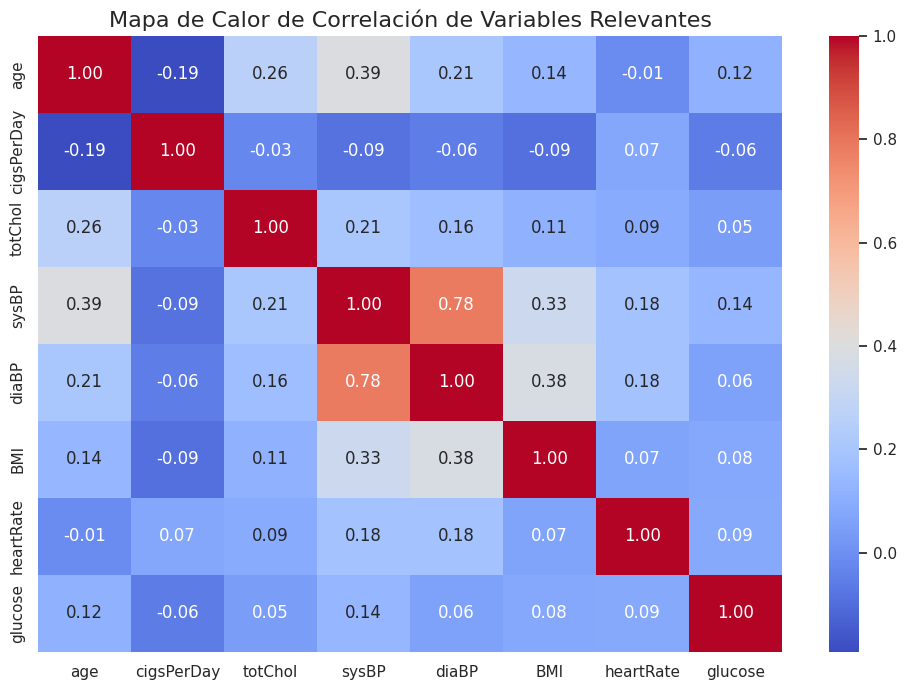

In [9]:
"""
Análisis de correlación enfocado en variables continuas.
"""

if 'df' in locals():
    print("--- Análisis de Correlación ---")

    df_for_correlation = df.copy()


    columns= [
        'age',
        'cigsPerDay',
        'totChol',
        'sysBP',
        'diaBP',
        'BMI',
        'heartRate',
        'glucose'
    ]

    df_2 = df_for_correlation[columns]
    correlation_matrix = df_2.corr(method='pearson')

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f"
    )
    plt.title('Mapa de Calor de Correlación de Variables Relevantes', fontsize=16)
    plt.show()

else:
    print("Error: El DataFrame 'df' no ha sido definido.")

### Analisis de correlacion
De acuerdo a la grafica de correlacion, las variables de sysBP y diaBP su correlacion es muy fuerte con un 0.78% de correlacion, las demas correlaciones son moderadas a bajas lo que permite que aporten mas informacion.

Las variables que estan muy correlacionadas estan causando multicolinealidad y eso en un modelo posterior muestra mucha redundancia de informacion lo que hace que no se aproveche el maximo de informacion. Esta multicolinealidad se puede tratar ya sea eliminando una variable o utilizando tecnicas de regularizacion, que permitiran disminuir esa correlacion.

In [10]:
# Feature Engineering
#x_copy = df.copy()
# Dvision de datos
#x_copy = x_copy.drop(columns=['diaBP'])
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Division de datos de entranamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### Analisis Division de datos
Es importante dividir los datos en entrenamiento y prueba porque al no hacerse esta division el modelo puede llegar a memorizar en vez de aprender los patrones generales, entonces al separar el conjunto de pruebas se le esta pasando informacion nueva al modelo .

Este tipo de division ayuda al overfitting en las predicciones

In [11]:
# Seleccion de variables numericas sin variable target
numeric_cols_original = df.select_dtypes(include=np.number).drop(columns=['TenYearCHD']).columns.tolist()
print("Columnas numéricas originales:", numeric_cols_original)

# Escalado de variables numericas
scaler = StandardScaler()

# Escalado para data de entrenamiento
X_train_scaled = scaler.fit_transform(X_train[numeric_cols_original])
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=numeric_cols_original)

#X_train_scaled

# Escalado para data de test
X_test_scaled = scaler.fit_transform(X_test[numeric_cols_original])
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=numeric_cols_original)

#X_test_scaled

Columnas numéricas originales: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### Analisis Escalado de caracteristicas
KNN es un algoritmo que se basa en clasificar las distancias entre puntos, es decir, que si una variable tiene una mayor escala puede llegar a dominar la distancia. El escalado es obligatorio porque obliga a que todas las variables manejen el mismo calculo de distancia.

# Modelado con KNN

## Validacion cruzada

  - k =  1, F1-Score Promedio = 0.2530
  - k =  3, F1-Score Promedio = 0.2003
  - k =  5, F1-Score Promedio = 0.1655
  - k =  7, F1-Score Promedio = 0.1608
  - k =  9, F1-Score Promedio = 0.1125
  - k = 11, F1-Score Promedio = 0.0676
  - k = 13, F1-Score Promedio = 0.0677
  - k = 15, F1-Score Promedio = 0.0621
  - k = 17, F1-Score Promedio = 0.0368
  - k = 19, F1-Score Promedio = 0.0335
  - k = 21, F1-Score Promedio = 0.0303
  - k = 23, F1-Score Promedio = 0.0176
  - k = 25, F1-Score Promedio = 0.0260
  - k = 27, F1-Score Promedio = 0.0257
  - k = 29, F1-Score Promedio = 0.0213
  - k = 31, F1-Score Promedio = 0.0172
  - k = 33, F1-Score Promedio = 0.0172
  - k = 35, F1-Score Promedio = 0.0131
  - k = 37, F1-Score Promedio = 0.0085
  - k = 39, F1-Score Promedio = 0.0043
  - k = 41, F1-Score Promedio = 0.0000
  - k = 43, F1-Score Promedio = 0.0000
  - k = 45, F1-Score Promedio = 0.0000
  - k = 47, F1-Score Promedio = 0.0000
  - k = 49, F1-Score Promedio = 0.0000
  - k = 51, F1-Score Prom

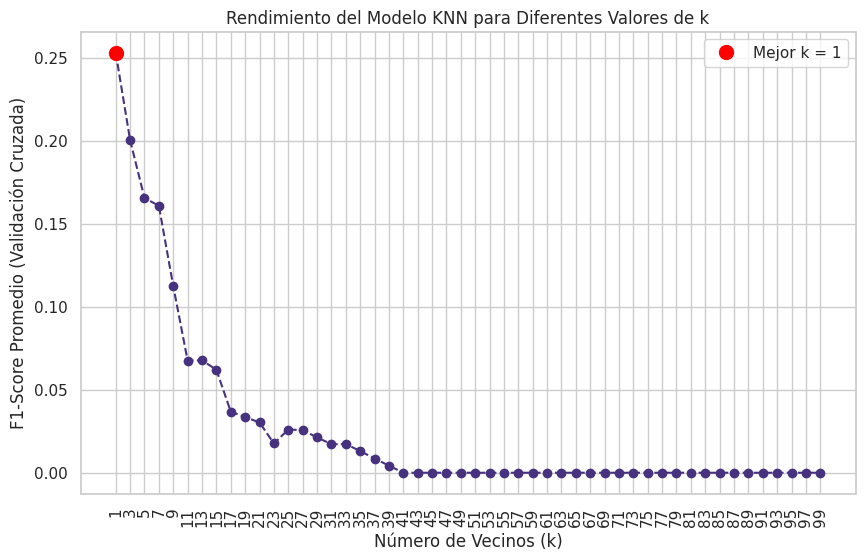

In [12]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

# Rango de los valores que puede tomar el K, en este caso es del 1 al 100
k_values = range(1, 100, 2)
X_train_np = X_train_scaled.values
y_train_np = y_train.values

f1_scores_sk = []

# validacion cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    fold_scores = []

    for train_index, val_index in kf.split(X_train_np):
        X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
        y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        fold_scores.append(f1_score(y_val_fold, y_val_pred))

    average_f1 = np.mean(fold_scores)
    f1_scores_sk.append(average_f1)
    print(f"  - k = {k:2d}, F1-Score Promedio = {average_f1:.4f}")

best_k_index = np.argmax(f1_scores_sk)
best_k = list(k_values)[best_k_index]
best_f1 = f1_scores_sk[best_k_index]

print("-" * 50)
print(f"🏆 Mejor valor encontrado: k = {best_k} con un F1-Score promedio de {best_f1:.4f}")
print("-" * 50)

plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores_sk, marker='o', linestyle='--')
plt.title('Rendimiento del Modelo KNN para Diferentes Valores de k')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('F1-Score Promedio (Validación Cruzada)')
plt.xticks(list(k_values), rotation=90)
plt.grid(True)

# Se resalta el mejor punto
plt.plot(best_k, best_f1, 'ro', markersize=10, label=f'Mejor k = {best_k}')
plt.legend()
plt.show()


 Reporte de Clasificación Final para KNN (k=1):

                   precision    recall  f1-score   support

No Enfermedad (0)       0.86      0.87      0.87      1079
   Enfermedad (1)       0.22      0.19      0.20       193

         accuracy                           0.77      1272
        macro avg       0.54      0.53      0.53      1272
     weighted avg       0.76      0.77      0.77      1272


 Reporte de Clasificación Final para KNN (k=100):



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   precision    recall  f1-score   support

No Enfermedad (0)       0.85      1.00      0.92      1079
   Enfermedad (1)       0.00      0.00      0.00       193

         accuracy                           0.85      1272
        macro avg       0.42      0.50      0.46      1272
     weighted avg       0.72      0.85      0.78      1272



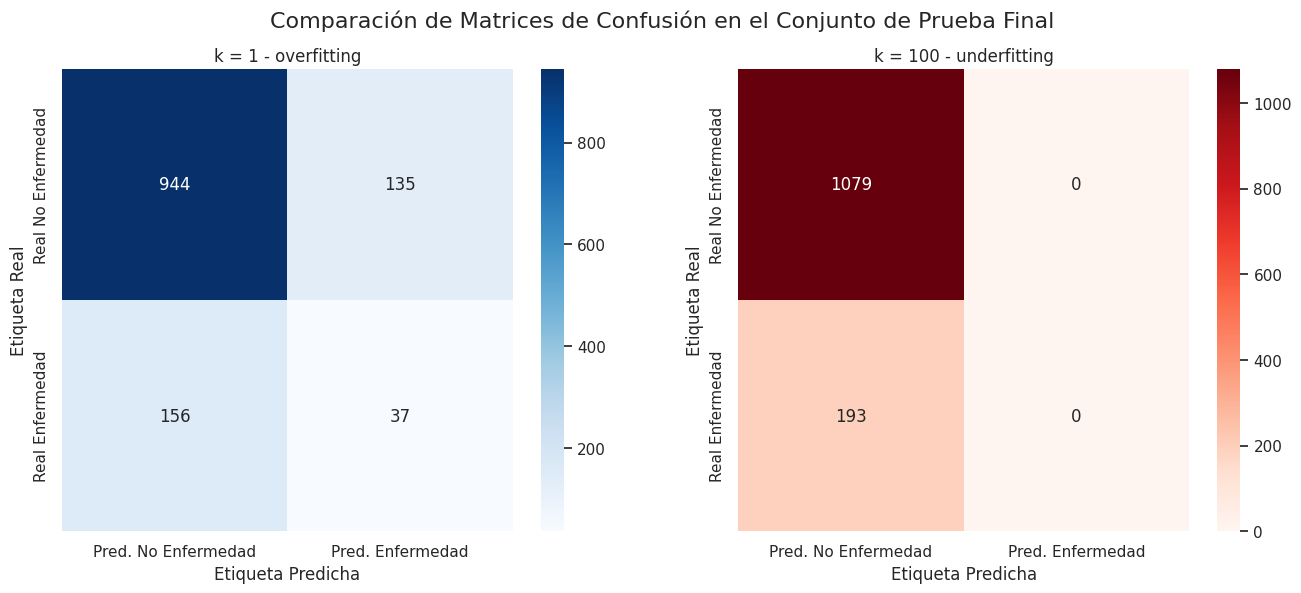

In [13]:
# KNN CON K = 1
sklearn_knn1 = KNeighborsClassifier(n_neighbors=1, weights='distance')

# Entrenamiento
sklearn_knn1.fit(X_train_scaled, y_train)

# Hacer predicciones a los casos de prueba
y_pred_knn1 = sklearn_knn1.predict(X_test_scaled)

print("\n Reporte de Clasificación Final para KNN (k=1):\n")
print(classification_report(y_test, y_pred_knn1, target_names=['No Enfermedad (0)', 'Enfermedad (1)']))

# Visualizar la Matriz de Confusión
cm_knn1 = confusion_matrix(y_test, y_pred_knn1)
tn_k1, fp_k1, fn_k1, tp_k1 = cm_knn1.ravel()

# KNN CON K = 100
sklearn_knn100 = KNeighborsClassifier(n_neighbors=100, weights='distance')

# Entrenamiento
sklearn_knn100.fit(X_train_scaled, y_train)

# Hacer predicciones a los casos de prueba
y_pred_knn100 = sklearn_knn100.predict(X_test_scaled)

print("\n Reporte de Clasificación Final para KNN (k=100):\n")
print(classification_report(y_test, y_pred_knn100, target_names=['No Enfermedad (0)', 'Enfermedad (1)']))

# Visualizar la Matriz de Confusión
cm_knn100 = confusion_matrix(y_test, y_pred_knn100)
tn_k100, fp_k100, fn_k100, tp_k100 = cm_knn1.ravel()

# --- Gráficos Comparativos ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Comparación de Matrices de Confusión en el Conjunto de Prueba Final', fontsize=16)

# Matriz para k=3
sns.heatmap(cm_knn1, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Pred. No Enfermedad', 'Pred. Enfermedad'],
            yticklabels=['Real No Enfermedad', 'Real Enfermedad'])
axes[0].set_title('k = 1 - overfitting')
axes[0].set_ylabel('Etiqueta Real')
axes[0].set_xlabel('Etiqueta Predicha')

# Matriz para k=13
sns.heatmap(cm_knn100, annot=True, fmt='d', cmap='Reds', ax=axes[1],
            xticklabels=['Pred. No Enfermedad', 'Pred. Enfermedad'],
            yticklabels=['Real No Enfermedad', 'Real Enfermedad'])
axes[1].set_title('k = 100 - underfitting')
axes[1].set_ylabel('Etiqueta Real')
axes[1].set_xlabel('Etiqueta Predicha')

plt.show()


 Reporte de Clasificación Final para KNN (k=3):

                   precision    recall  f1-score   support

No Enfermedad (0)       0.86      0.94      0.90      1079
   Enfermedad (1)       0.27      0.12      0.17       193

         accuracy                           0.82      1272
        macro avg       0.56      0.53      0.53      1272
     weighted avg       0.77      0.82      0.79      1272

Detalle para k=3:
  - Diagnosticos que se escaparon (FN): 169
  - Diagnosticos atrapados (TP):        24
------------------------------


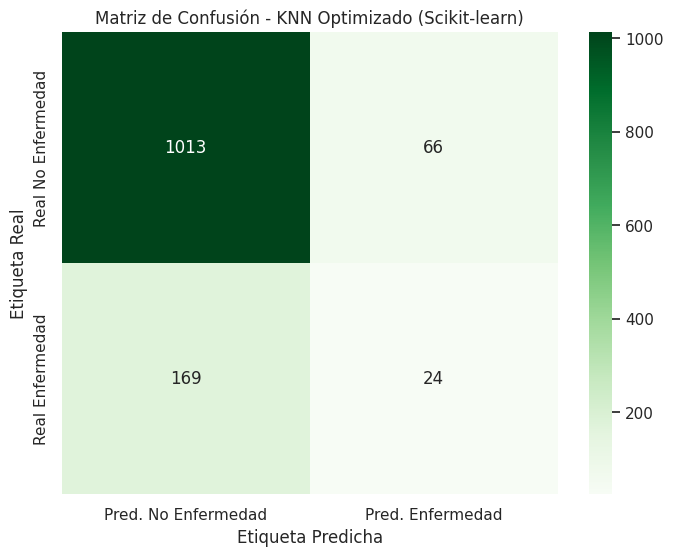

In [14]:
sklearn_knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Entrenamiento
sklearn_knn.fit(X_train_scaled, y_train)

# Hacer predicciones a los casos de prueba
y_pred_knn = sklearn_knn.predict(X_test_scaled)

print("\n Reporte de Clasificación Final para KNN (k=3):\n")
print(classification_report(y_test, y_pred_knn, target_names=['No Enfermedad (0)', 'Enfermedad (1)']))

# Visualizar la Matriz de Confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn_k3, fp_k3, fn_k3, tp_k3 = cm_knn.ravel()

print(f"Detalle para k=3:")
print(f"  - Diagnosticos que se escaparon (FN): {fn_k3}")
print(f"  - Diagnosticos atrapados (TP):        {tp_k3}")
print("-" * 30)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred. No Enfermedad', 'Pred. Enfermedad'],
            yticklabels=['Real No Enfermedad', 'Real Enfermedad'])
plt.title('Matriz de Confusión - KNN Optimizado (Scikit-learn)')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

### Analisis
El dataset tiene mas pacientes sanos que enfermos, lo que hace que el modelo sea sesgado a la clase 0 que es la mayoritaria.

El modelo sabe predecir muy bien los pacientes que no tienen enfermedad con respecto a los que si tienen.

Se adiciono un hiperparametro de weight='distance' que va a permitir predecir mas casos de enfermedad pero sacrificandose la precision para los casos que no tienen enfermedad. En este caso de uso en medicina se prefiere bajar los falsos negativos, es decir, aumentar los verdaderos positivos.

### Hiperparametros K
De acuerdo a los 3 casos de prueba con los k de k=3 (grafica verde) - k=1 (grafica azul) y k=100 (grafica roja).

Se puede observar que el k=1 es un caso de sobreajuste, donde ya el modelo aprendio mucho sobre los detalles, es por eso, que es el modelo que mas verdaderos positivos predice.

La varianza es alta y sesgo bajo ya que se ajusta perfecto a los datos de entrenamiento.

Con el k=100 el modelo cae en un subajuste, donde practicamente predice todo los casos que no son enfermedad, es decir, tiene una alta precision a lo que corresponde a la clase mayoritaria pero cuando tiene que predecir si el caso es enfermedad no predice ningun caso.

La varianza es baja ya que es estable frente a cambios en los datos y sesgo alto ya que no captura los detalles.

Finalmente, cuando el k=3 muestra un punto intermedio falla en los verdaderos positivos pero al menos logra identificar casos de enfermedad.Ademas, el F1-Score tiene un mejor rendimiento que los extremos, porque tiene a balancear mas la sensibilidad y la precision

La varianza y el sesgo son mas flexibles, aunque haya sesgo a la clase mayoritaria, puede capturar patrones en la clase minoritaria.

### Dimensionalidad
Con respecto a la dimensionalidad, este problema aparece cuando hay muchas variables predictoras en el dataset y es un tema que perjudica a los modelos que se basan en distancias como el KNN.

Debido, a que cada dimension al expandir el espacio de busqueda, el punto mas cercano y el mas lejano terminan teniendo distancias similares, es por eso, que se necesita cubrir ese espacio con datos para que los vecinos sean representativos a lo que es un problema con el dataset ya que hay un desbalance en la informacion.

### Interpretabilidad

Un modelo de KNN no es 100% interpretable pero si se puede justifcar porque el paciente es clasificado de alto riesgo. En este caso, es porque hubo pacientes que ya presentaban caracteristicas similares que hizo que el nuevo pacientes fuera clasificado con un riesgo alto

# Modelado con Regresion Logistica

In [14]:
model = LogisticRegression()
model.fit(X_train,y_train)